<h1 align="center">Week2 Assignmnet - KNN</h1> <br>
By: Safa Salih <br>
MSDS680- Machine Learning <br>
Dr. Siripun Sanguansintukul <br>
01/24/2022

### Abstract



In this assignment, I'm going to build a K-NN classifier which will predict the presence of heart disease in a patient or not. 
<br>

### Analysis:

<b>First</b>, I will import all needed libraries.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score

<b>Second</b>, I will read the heart disease dataset and perform simple EDA.
<br>
From the EDA, we can see that this database contains 282 participant, and 14 attribute, The “goal” field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4, which i transformed into (0 and 1) only. the number of participants who don't have a heart disease are 157 and the once who have heart disease are 125. at the end of this part i will create a heatmap correlation matrix to look for possible realtionships within the dataset, in order to understand the data even better.

In [2]:
df = pd.read_csv('~/Desktop/heart.disease.data.clean.csv')
df.head()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50.0,20.0,1,1,2,150,0,6,0
1,67,1,4,160,286,40.0,40.0,0,1,2,108,1,3,2
2,67,1,4,120,229,20.0,35.0,0,1,2,129,1,7,1
3,37,1,3,130,250,0.0,0.0,0,1,0,187,0,3,0
4,41,0,2,130,204,0.0,0.0,0,1,2,172,0,3,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.195035,247.705674,16.836011,15.347364,0.148936,0.620567,1.014184,149.826241,0.326241,4.677305,0.907801
std,9.053083,0.468338,0.955405,16.739821,46.178771,18.876755,15.276814,0.356658,0.486108,0.998118,22.737594,0.469670,1.936386,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,11.976385,15.000000,0.000000,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,75.000000,54.000000,1.000000,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


In [4]:
df.shape

(282, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      282 non-null    float64
 6   years     282 non-null    float64
 7   fbs       282 non-null    int64  
 8   famhist   282 non-null    int64  
 9   restecg   282 non-null    int64  
 10  thalach   282 non-null    int64  
 11  exang     282 non-null    int64  
 12  thal      282 non-null    int64  
 13  num       282 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 31.0 KB


In [6]:
df.num.value_counts()

0    157
1     50
3     32
2     31
4     12
Name: num, dtype: int64

I will convert the num column into target column with only tow values (0=have a heart disease and 1= don't have heart disease), and then visualize it.

In [7]:
df = df.replace({'num': {2: 1, 3: 1, 4: 1}}) # Converting the num column into factor (0-as no disease or 1-have disease)

In [8]:
df.num.value_counts() # counting the number of patients who have heart disease.

0    157
1    125
Name: num, dtype: int64

In [9]:
df=df.rename(columns={"num":"target"}) # changing the column name num to target.

<AxesSubplot:title={'center':'Count of Diagnosis of Heart Disease'}>

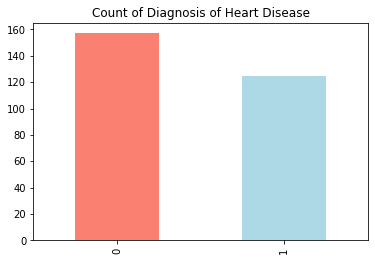

In [10]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue'], title="Count of Diagnosis of Heart Disease")

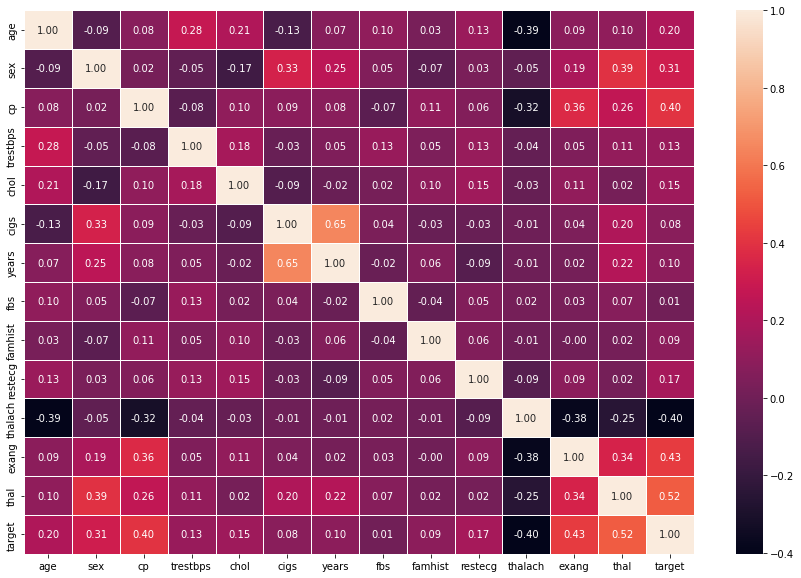

In [11]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f"
                )

<b>Third</b>, Performing KNN by splitting the data to train and test.

I labeled the data into x and y, Next I splitted 80% of the data to the training set while 20% of the data to test set, and then I normalized the train data.

In [12]:
x= df.iloc[:,0:13].values 
y= df['target'].values

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

Here, I will K-NN model and train it with the training data, I chose number 3 for the n_neighbore as a start.
An then I will test the model and check accuracy.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [15]:
preds1 = knn.predict(x_test) # Prediction of the test variable.

print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds1)

Actuals for test data set
[1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1]
Predictions for test data set
[1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [16]:
knn.score(x_test, y_test) # Testing accuracy

0.7894736842105263

In [17]:
accuracy_score(y_test, preds1) 

0.7894736842105263

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,preds1)

array([[23,  9],
       [ 3, 22]])

In [19]:
classification_report(y_test, preds1)

'              precision    recall  f1-score   support\n\n           0       0.88      0.72      0.79        32\n           1       0.71      0.88      0.79        25\n\n    accuracy                           0.79        57\n   macro avg       0.80      0.80      0.79        57\nweighted avg       0.81      0.79      0.79        57\n'

Now, I will check for the best value of K, and I will repeat the KNN process using the optimal K value the code produced. Using the optimal K led to higher accuracy level.
<br>
The graph below show the optimal K value with the associated error rate. I also applied the confusion matrix and the output were, 26 and 22 are correct predictions, and 6 and 3 are incorrect predictions. 

Minimum error:- 0.15789473684210525 at K = 10


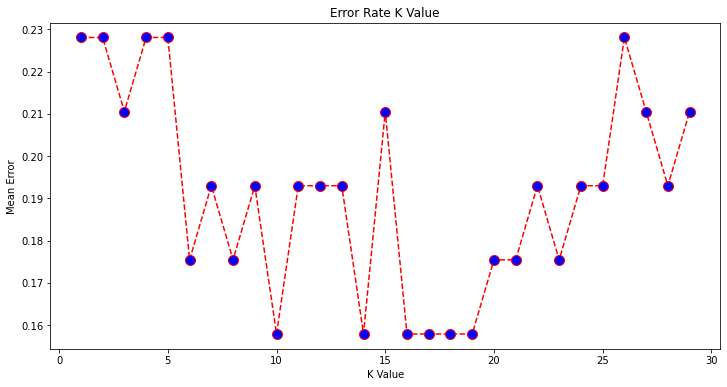

In [20]:
error = []   
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [21]:
knn= KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

In [22]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [23]:
Preds2 = knn.predict(x_test)

In [24]:
knn.score(x_test,y_test)

0.8421052631578947

In [25]:
confusion_matrix(y_test,Preds2)

array([[26,  6],
       [ 3, 22]])

Finally, I will use the MinMaxScaler to improve my model.
<br>
<br>
The RCL value represent the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.<br>
Though I didn't see improvement using the MinMaxScaler,  but in general scaling data is one of the main tools to improve the machine learning model.

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)

In [28]:
from sklearn.metrics import recall_score
knn_acc_score = accuracy_score(y_test, knn_predicted)
rcl=recall_score(y_test,knn_predicted)

In [29]:
print("Acc of K-NeighborsClassifier:",knn_acc_score,'\n')
print("rcl of K-NeighborsClassifier:",rcl,'\n') 


Acc of K-NeighborsClassifier: 0.8421052631578947 

rcl of K-NeighborsClassifier: 0.88 



In [30]:
accuracy_score(y_test, knn_predicted) 

0.8421052631578947

In [31]:
differs_norm = y_test - knn_predicted

print(f'Differences between the two sets:\n{differs_norm}')


Differences between the two sets:
[ 0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0
  1  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  1  0
  0  0  0  0 -1  0  1  0  0]


### Conclusion
<br>
In this assignment, I have successfully built a heart disease classifier using K-NN which is capable of classifying heart patient with optimal accuracy.<br>
I have learned to build Machine Learning model (K-NN), that will predict whether the person is suffering from heart disease or not. Due to the fast and accurate classification of Heart Disease, doctors will provide proper treatment to the patients and save their life.
